In [1]:
import torch
from torch.autograd import Variable

from torch import nn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(3)


# make data

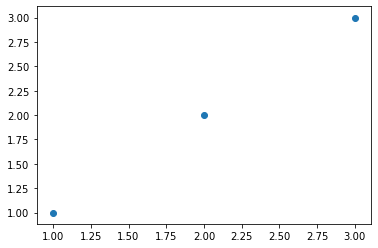

In [3]:
x_train = torch.Tensor([[1],[2],[3]])
y_train = torch.Tensor([[1],[2],[3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# Naive Model


## Define Linear model

In [4]:
x, y

(tensor([[1.],
         [2.],
         [3.]]), tensor([[1.],
         [2.],
         [3.]]))

In [5]:
W = Variable(torch.rand(1,1))
W

tensor([[0.0043]])

In [6]:
x.mm(W) 

tensor([[0.0043],
        [0.0085],
        [0.0128]])


## Define cost function

loss(x,y)=1/n∑|xi−yi|2loss(x,y)=1/n∑|xi−yi|2

In [7]:
cost_func = nn.MSELoss()

cost_func

MSELoss()


## Training Linear Regression

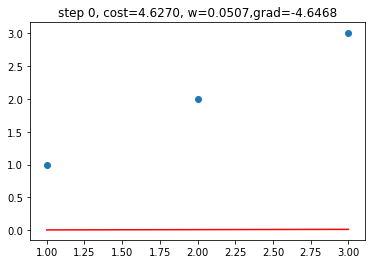

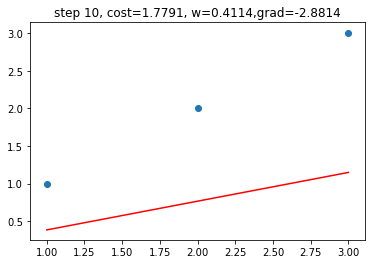

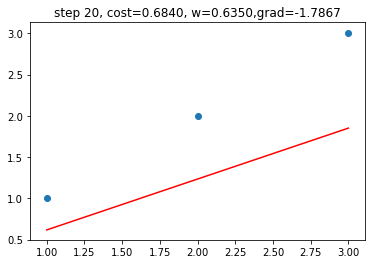

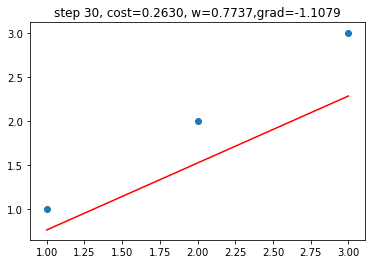

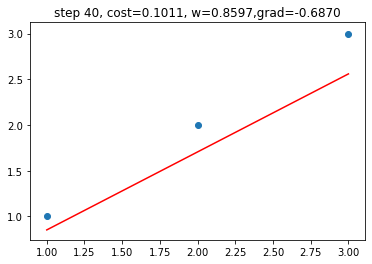

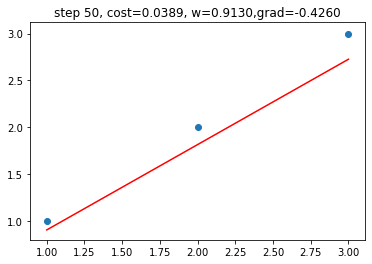

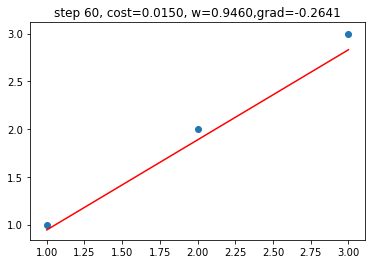

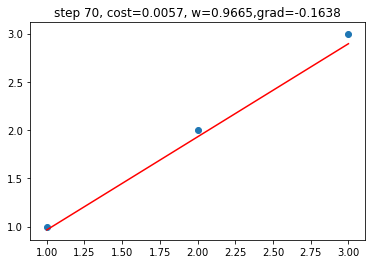

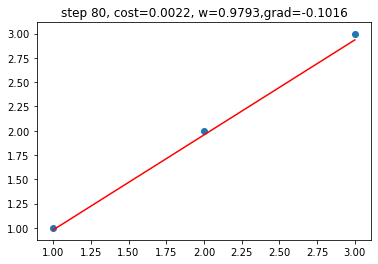

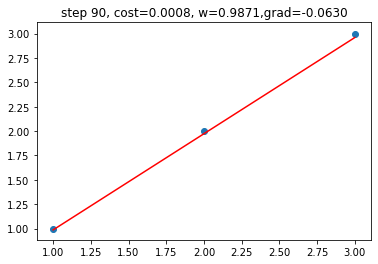

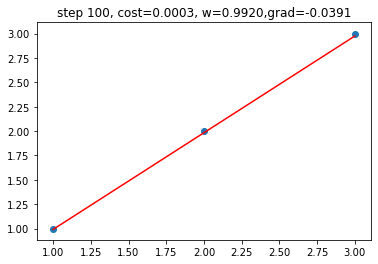

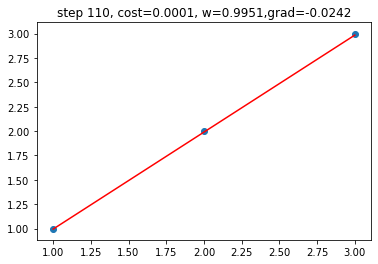

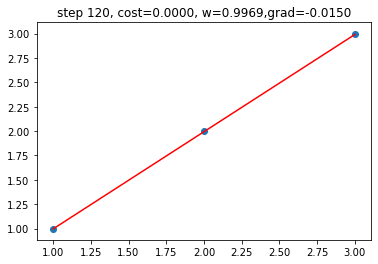

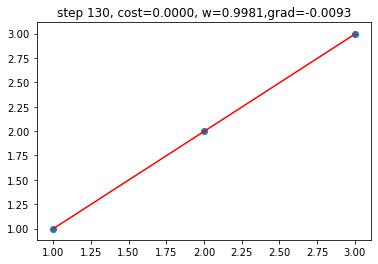

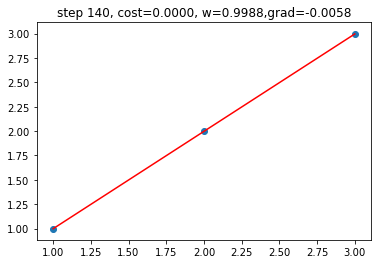

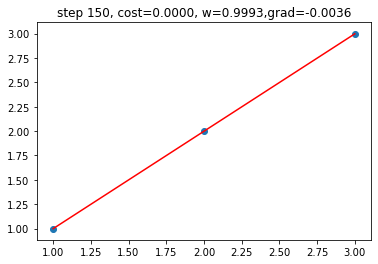

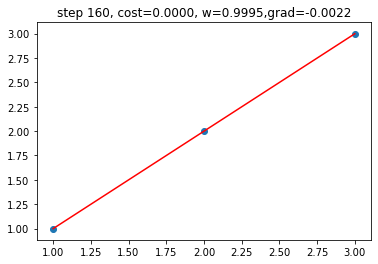

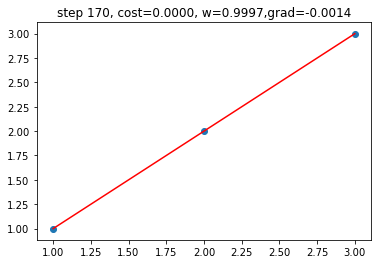

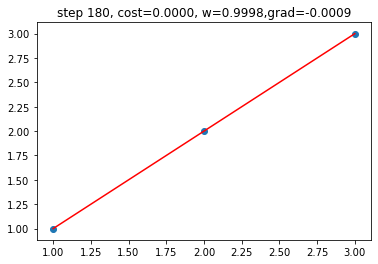

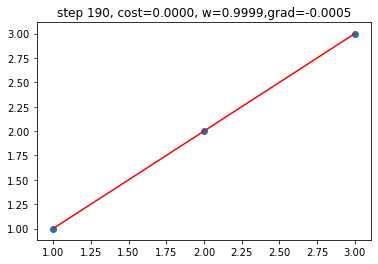

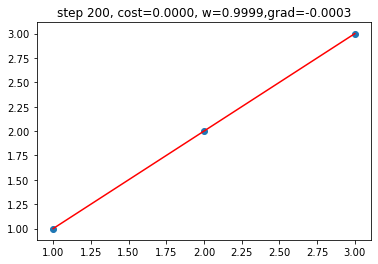

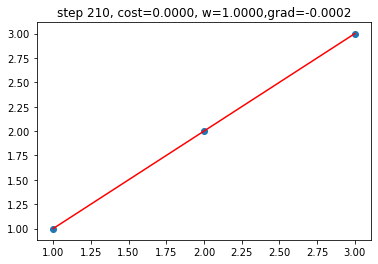

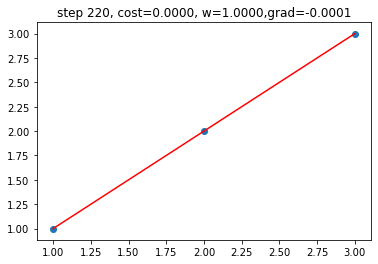

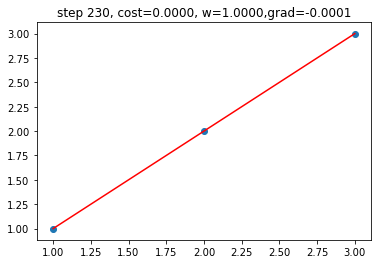

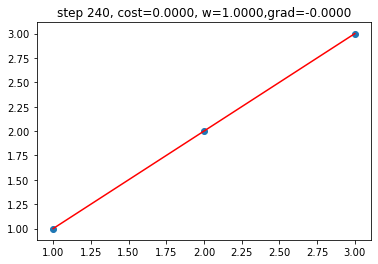

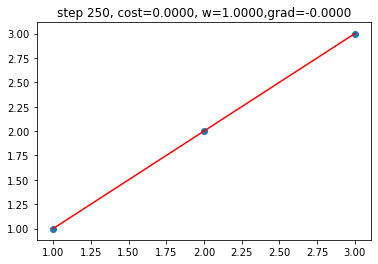

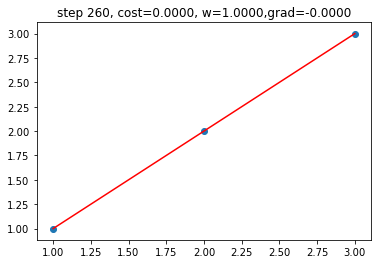

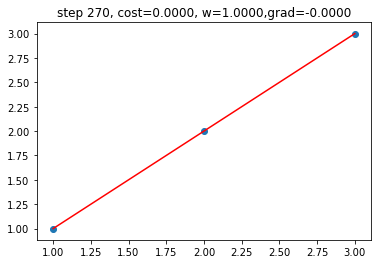

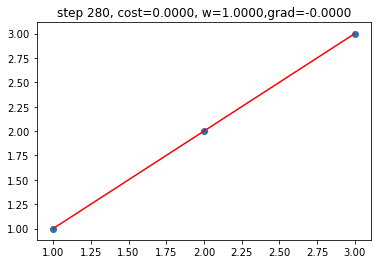

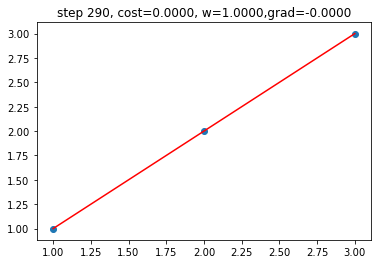

In [8]:
plt.ion()

lr = 0.01

for step in range(300):
    prediction = x.mm(W)
    cost = cost_func(prediction, y)
    gradient = (prediction-y).view(-1).dot(x.view(-1)) / len(x)
    W -= lr * gradient
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' %  (step,cost.data, W.data[0], gradient.data))
        plt.show()
    
#     if step %10 == 0:
#         print(step, "going cost")
#         print(cost)
#         print((prediction-y).view(-1))
#         print((x.view(-1)))
#         print(gradient)
#         print(W)
plt.ioff()

In [9]:
x_test = Variable(torch.Tensor([[5]]))
y_test = x_test.mm(W)
y_test

tensor([[5.0000]])


# w/ nn Module

## Define Linear Model

In [10]:
model  = nn.Linear(1, 1, bias=True)

print(model)

model.weight, model.bias

Linear(in_features=1, out_features=1, bias=True)


(Parameter containing:
 tensor([[-0.7889]], requires_grad=True), Parameter containing:
 tensor([-0.4283], requires_grad=True))

In [11]:
cost_func = nn.MSELoss()

In [12]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[-0.7889]], requires_grad=True)
Parameter containing:
tensor([-0.4283], requires_grad=True)


In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


## Training w/ nn module

In [14]:
model(x)

tensor([[-1.2172],
        [-2.0060],
        [-2.7949]], grad_fn=<AddmmBackward>)

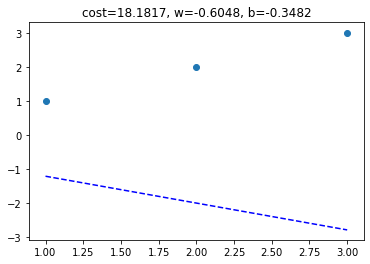

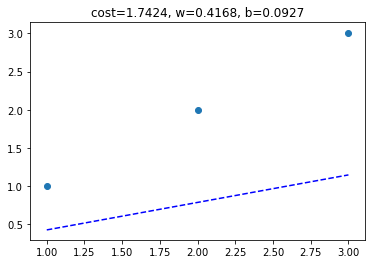

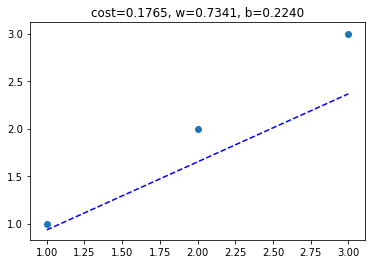

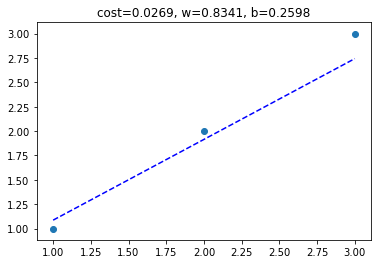

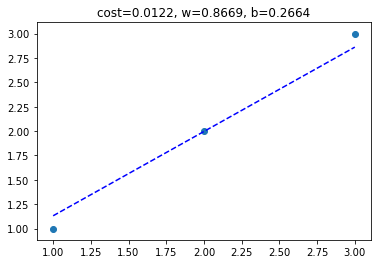

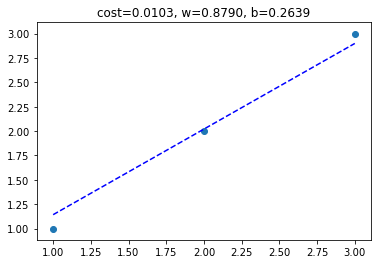

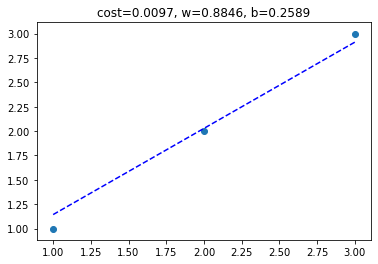

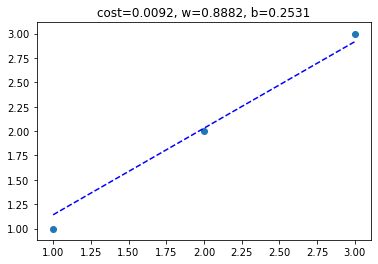

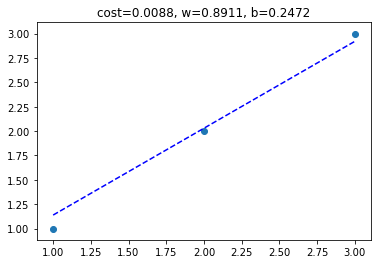

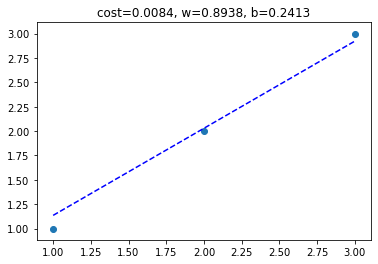

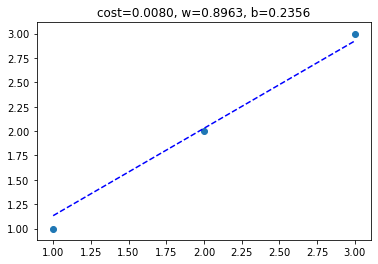

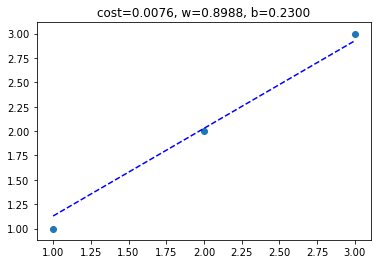

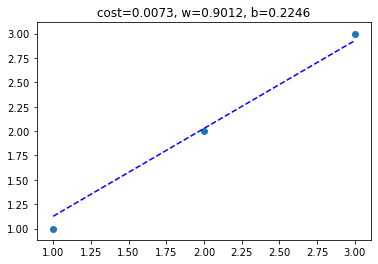

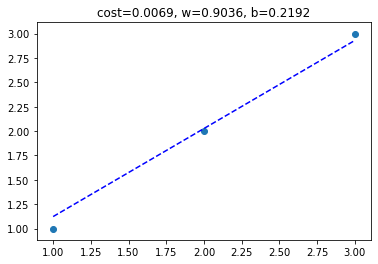

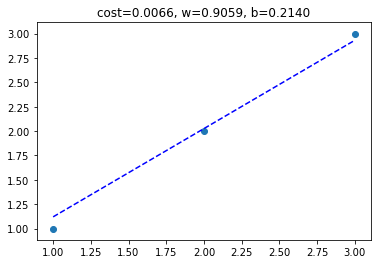

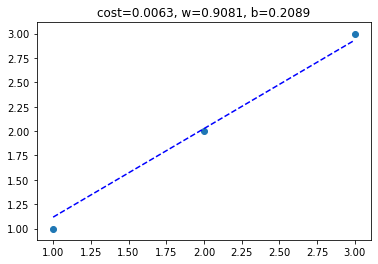

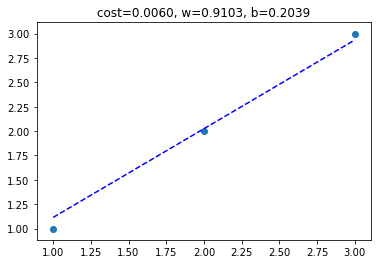

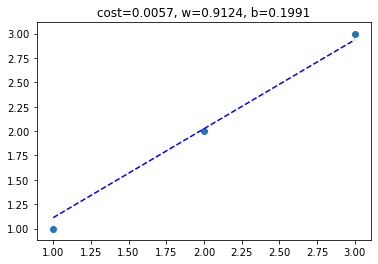

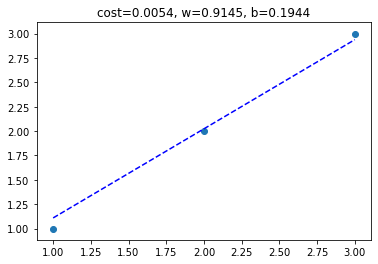

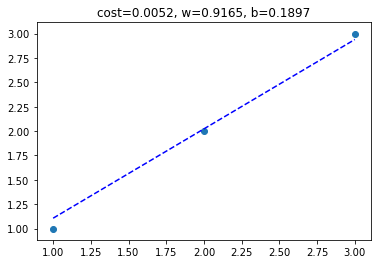

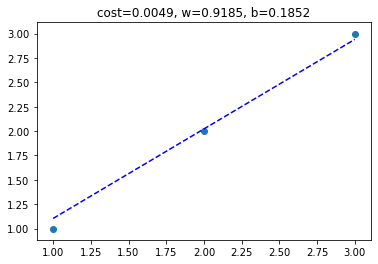

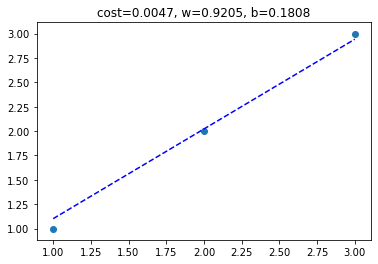

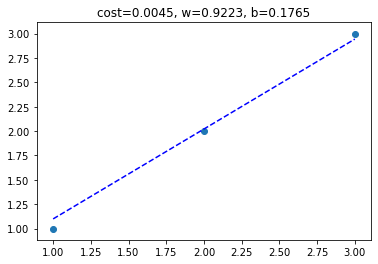

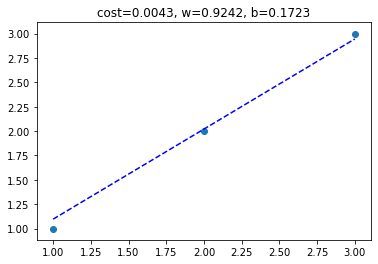

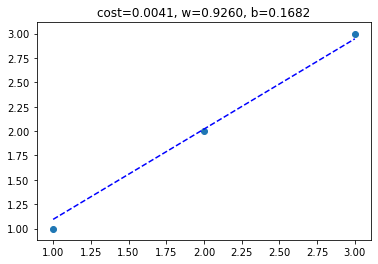

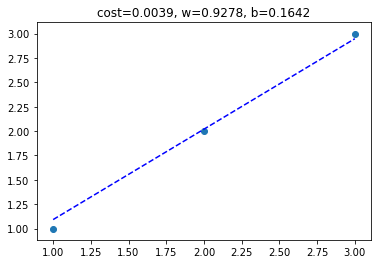

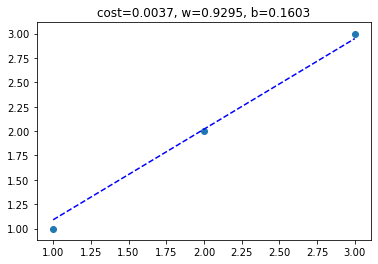

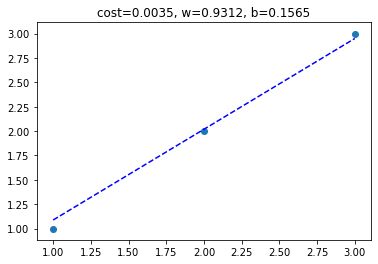

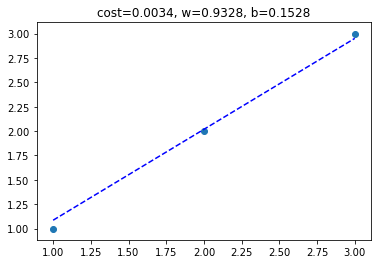

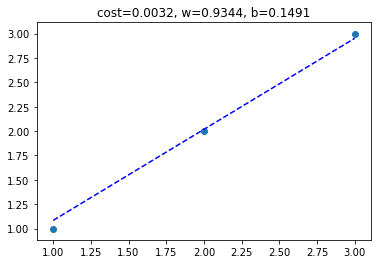

In [15]:
plt.ion()

for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data,model.weight.data[0][0],model.bias.data))
        plt.show()

plt.ioff()

In [16]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:6.6965


In [17]:
for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:6.8526


In [18]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.9688]], requires_grad=True), Parameter containing:
 tensor([0.0709], requires_grad=True))


###  Has "nn.MSELoss()"  Convex Cost Space?

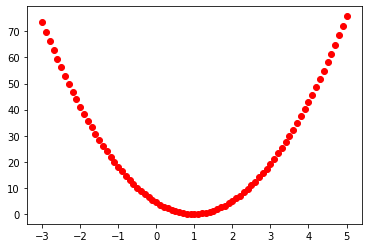

In [19]:
W_val, cost_val = [], []

for i in range(-30, 51):
    W = i * 0.1
    model.weight.data.fill_(W)
    cost =  cost_func(model(x),y)
    
    W_val.append(W)
    cost_val.append(cost.data)

plt.plot(W_val, cost_val, 'ro')
plt.show()


# Multivariate Linear model

In [20]:
import numpy as np


## make Data

In [21]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print('shape: ', x_data.shape, '\nlength:', len(x_data), '\n', x_data )
print('shape: ', y_data.shape, '\nlength:', len(y_data), '\n', y_data )

shape:  (25, 3) 
length: 25 
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
shape:  (25, 1) 
length: 25 
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [22]:
x, y = Variable(torch.from_numpy(x_data)), Variable(torch.from_numpy(y_data))
x, y

(tensor([[ 73.,  80.,  75.],
         [ 93.,  88.,  93.],
         [ 89.,  91.,  90.],
         [ 96.,  98., 100.],
         [ 73.,  66.,  70.],
         [ 53.,  46.,  55.],
         [ 69.,  74.,  77.],
         [ 47.,  56.,  60.],
         [ 87.,  79.,  90.],
         [ 79.,  70.,  88.],
         [ 69.,  70.,  73.],
         [ 70.,  65.,  74.],
         [ 93.,  95.,  91.],
         [ 79.,  80.,  73.],
         [ 70.,  73.,  78.],
         [ 93.,  89.,  96.],
         [ 78.,  75.,  68.],
         [ 81.,  90.,  93.],
         [ 88.,  92.,  86.],
         [ 78.,  83.,  77.],
         [ 82.,  86.,  90.],
         [ 86.,  82.,  89.],
         [ 78.,  83.,  85.],
         [ 76.,  83.,  71.],
         [ 96.,  93.,  95.]]), tensor([[152.],
         [185.],
         [180.],
         [196.],
         [142.],
         [101.],
         [149.],
         [115.],
         [175.],
         [164.],
         [141.],
         [141.],
         [184.],
         [152.],
         [148.],
         [192.],
  


## make Model

In [23]:
mv_model = nn.Linear(3, 1, bias=True)

print(mv_model)

Linear(in_features=3, out_features=1, bias=True)


In [24]:
print('weigh : ', mv_model.weight)
print('bias   : ', mv_model.bias)

weigh :  Parameter containing:
tensor([[-0.5462, -0.0328, -0.5079]], requires_grad=True)
bias   :  Parameter containing:
tensor([0.3139], requires_grad=True)


In [25]:
cost_func = nn.MSELoss()

optimizer = torch.optim.SGD(mv_model.parameters(), lr=1e-5)


## Training Model

In [26]:
for step in range(2000):
    optimizer.zero_grad()
    
    prediction = mv_model(x)
    cost = cost_func(prediction, y)
    cost.backward()
    
    optimizer.step()
    
    if step % 50 == 0:
        print(step, "Cost: ", cost.data.numpy(), "\nPrediction:\n", prediction.data.t().numpy())

0 Cost:  63235.746 
Prediction:
 [[ -80.27773  -100.60726   -96.996895 -106.12925   -77.27918   -58.080135
   -78.91204   -57.67022   -95.51112   -89.83046   -76.7492    -77.639465
   -99.82084   -82.53922   -79.93342  -102.16385   -79.28944   -94.11811
   -94.45171   -84.123055  -93.00944   -94.55529   -88.18653   -79.98301
  -103.4257  ]]
50 Cost:  18.114258 
Prediction:
 [[156.05579 183.55751 182.9336  198.77402 139.43988 101.76946 149.3429
  111.57456 170.13354 156.31465 143.15779 139.25809 189.34947 157.79968
  149.39186 186.222   149.59128 179.80757 181.2073  162.5206  174.65862
  172.05891 166.99348 158.21191 191.04263]]
100 Cost:  17.597153 
Prediction:
 [[155.98497 183.58311 182.89873 198.7732  139.45627 101.85179 149.36647
  111.62254 170.22855 156.49464 143.17534 139.33849 189.27736 157.69406
  149.43619 186.27318 149.47993 179.83368 181.1156  162.4333  174.68892
  172.11212 167.0024  158.05605 191.0343 ]]
150 Cost:  17.10247 
Prediction:
 [[155.91576  183.60812  182.86464  

In [27]:
mv_model.state_dict()

OrderedDict([('weight', tensor([[0.4244, 0.7125, 0.8787]])),
             ('bias', tensor([0.3253]))])


## test

In [28]:
print("Model score : ",mv_model(Variable(torch.Tensor([[73,80,75]]))).data.numpy())
print("Real score : 73,80,75,152")

Model score :  [[154.20667]]
Real score : 73,80,75,152


In [29]:
accuracy_list = []
for i,real_y in enumerate(y):
    accuracy = (mv_model((x[i])).data.numpy() - real_y.data.numpy())
    accuracy_list.append(np.absolute(accuracy))

for accuracy in accuracy_list:
    print(accuracy)

print("sum accuracy : ",sum(accuracy_list))
print("avg accuracy : ",sum(accuracy_list)/len(y))

[2.206665]
[0.7886658]
[2.0148926]
[2.7599335]
[2.1610565]
[2.9208755]
[0.9915314]
[2.1078796]
[2.3834229]
[2.9483948]
[2.6270142]
[0.36787415]
[3.4411316]
[2.9959717]
[2.582199]
[4.4401703]
[0.38412476]
[2.4570618]
[1.7881927]
[1.223587]
[1.5184631]
[1.5491943]
[7.7469788]
[5.1026306]
[1.1957245]
sum accuracy :  [60.703636]
avg accuracy :  [2.4281454]
